<h1>EvoCluster</h1>
An Open-Source Nature-Inspired Optimization Clustering Framework in Python

EvoCluster is an open source and cross-platform framework implemented in Python which includes the most well-known and recent nature-inspired metaheuristic  optimizers  that  are  customized  to  perform  partitional  clustering tasks.  

The  goal  of  this  framework  is  to  provide  a  user-friendly  and  customizable implementation of the metaheuristic based clustering algorithms which can be utilized by experienced and non-experienced users for different applications.

The framework can also be used by researchers who can benefit from the implementation of the metaheuristic optimizers for their research studies. 

EvoCluster can be extended by designing other optimizers, including more objective func-tions, adding other evaluation measures, and using more data sets. 

The current implementation  of  the  framework  includes  ten  metaheristic  optimizers,  thirtydatasets,  five  objective  functions,  and  twelve  evaluation  measures.  

The full list of implemented optimizers is available here https://github.com/7ossam81/EvoloPy/wiki/List-of-optimizers

<h2>Features</h2>

*   Ten nature-inspired metaheuristic optimizers are implemented.
*   The implimentation uses the fast array manipulation using [NumPy] (http://www.numpy.org/).
*   Matrix support using [SciPy's] (https://www.scipy.org/) package.
*   More optimizers are comming soon

<h2>Installation<//h2>

Python 3.xx is required.

<h2>Install packages</h2>

Install sklearn, NumPy and SciPy
*   *pip install NumPy*
*   *pip install SciPy*
*   *pip install sklearn*

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/EvoCluster.git

In [1]:
!git clone https://github.com/RaneemQaddoura/EvoCluster.git

Cloning into 'EvoCluster'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 339 (delta 126), reused 154 (delta 64), pack-reused 78
Receiving objects: 100% (339/339), 924.37 KiB | 18.12 MiB/s, done.
Resolving deltas: 100% (135/135), done.


<h2>User Preferences</h2>

In [0]:
# Select optimizers
# SSA,PSO,GA,BAT,FFA,GWO,WOA,MVO,MFO,CS
optimizer=["PSO", "SSA"]

In [0]:
# Select objective function
# SSE,TWCV,SC,DB,DI
objectivefunc=["SSE", "TWCV"] 

In [0]:
# Select data sets
#aggregation,aniso,appendicitis,balance,banknote,blobs,Blood,circles,diagnosis_II,ecoli,flame,glass,heart,ionosphere,iris,iris2D,jain,liver,moons,mouse,pathbased,seeds,smiley,sonar,varied,vary-density,vertebral2,vertebral3,wdbc,wine
dataset_List = ["iris","flame"]

In [0]:
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs are executed for each algorithm.
NumOfRuns=3

In [0]:
# Select general parameters for all optimizers (population size, number of iterations) ....
params = {'PopulationSize' : 25, 'Iterations' : 50}

In [0]:
#Export results?
export_flags = {'Export_avg':True, 'Export_details':True, 'Export_details_labels':True, 
'Export_convergence':True, 'Export_boxplot':True}

In [0]:
# Change working directory
import os
os.chdir("EvoCluster/")

<h2>Run Framework</h2>

Dataset: iris
Run no.: 0
PSO is optimizing  "SSE"
['At iteration 1 the best fitness is 27.029517461940834']
['At iteration 2 the best fitness is 16.33915729481651']
['At iteration 3 the best fitness is 15.80176079950459']
['At iteration 4 the best fitness is 15.80176079950459']
['At iteration 5 the best fitness is 15.80176079950459']
['At iteration 6 the best fitness is 13.976272064571319']
['At iteration 7 the best fitness is 13.976272064571319']
['At iteration 8 the best fitness is 11.952401172447459']
['At iteration 9 the best fitness is 11.329116585062113']
['At iteration 10 the best fitness is 11.329116585062113']
['At iteration 11 the best fitness is 11.329116585062113']
['At iteration 12 the best fitness is 11.329116585062113']
['At iteration 13 the best fitness is 11.329116585062113']
['At iteration 14 the best fitness is 11.329116585062113']
['At iteration 15 the best fitness is 9.392206109141464']
['At iteration 16 the best fitness is 9.392206109141464']
['At iteration 17 the

IndexError: ignored

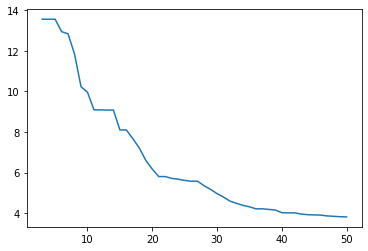

In [9]:
# Run EvoCluster
from optimizer_run import run
run(optimizer, objectivefunc, dataset_List, NumOfRuns, params, export_flags)